## 🔍 What is RAGAS?

https://docs.ragas.io/en/stable/

**RAGAS** stands for **Retrieval-Augmented Generation Assessment**.  
It’s an **open-source evaluation framework** that helps you **measure the quality** of your RAG pipelines.

In simple words:  
> “It tells you how good your RAG system is — at retrieving useful chunks, generating accurate and faithful answers, and being self-aware when it doesn’t know.”

---

## 🧱 Why Do We Need RAGAS?

In RAG systems:
- The LLM answers a question based on documents retrieved by a search engine.
- We want to **ensure each step works well** — both the **retrieval** and the **generation**.

🛠 Traditional LLM evaluation (e.g., BLEU, ROUGE) doesn't work well here because:
- Answers might be factually correct but worded differently.
- We care more about **truthfulness**, **faithfulness**, and **context grounding**.

---

## 🔑 Key Metrics in RAGAS

Let’s walk through **each metric**, explain it in **simple words**, and give a **formula + example**.

---

### 📘 1. **Faithfulness**

**What it asks:**  
> "Is the generated answer truly supported by the retrieved context?"

- It checks if the answer **can be traced back** to the documents retrieved.

**Why it matters:**  
If the LLM "hallucinates" (i.e., makes up stuff), faithfulness will be low.

#### ✅ Formula (High-level):
Faithfulness = Similarity(generated_answer, grounded_facts_from_context)

- Evaluated using **Natural Language Inference (NLI)** models.
- Uses labels like “entailment”, “neutral”, “contradiction”

#### 🧠 Example:
**Context:** "Employees are eligible for 24 days of leave."  
**Question:** "How many leave days do I get?"  
**Answer:** "You get 30 days of leave." ❌  
➡️ Not faithful (answer contradicts the context)

---

### 🔍 2. **Context Precision**

**What it asks:**  
> "How much of the retrieved context is actually useful for answering the question?"

- It checks how much of the **retrieved info is relevant**.

#### ✅ Formula:
Context Precision = (# relevant context chunks) / (# total retrieved chunks)

#### 🧠 Example:
You retrieve 5 chunks, but only 2 were useful →  
Context Precision = 2/5 = 0.4 (low)

---

### 🧠 3. **Answer Relevancy**

**What it asks:**  
> "How relevant is the generated answer to the actual question?"

- Even if it’s not totally correct, was it **on topic**?

#### ✅ Formula:
Evaluated using a cross-encoder that measures semantic similarity between **question ↔ answer**

#### 🧠 Example:
**Question:** "What’s the deadline to claim reimbursements?"  
**Answer:** "Employees must serve a 30-day notice period."  
➡️ Low relevancy (off-topic)

---

### ✅ 4. **Answer Correctness**

**What it asks:**  
> "Is the answer factually correct compared to ground truth?"

- Needs labeled test data with correct answers.
- Often used during **benchmark testing**.

#### ✅ Formula:
Correctness = Similarity(predicted_answer, ground_truth_answer)

#### 🧠 Example:
**Ground Truth:** "10 business days"  
**Answer:** "Ten working days" → ✅ High correctness

---

### 🚫 5. **Context Recall**

**What it asks:**  
> "Did we retrieve all the chunks needed to answer the question completely?"

- Especially useful in **multi-hop QA** (where you need multiple pieces of info).

#### ✅ Formula:
Context Recall = (# relevant retrieved chunks) / (# relevant total chunks in corpus)

This metric is still **experimental** and not always enabled.

---

## 🔬 Additional Components

### ✅ 6. **RAGAS Score** (Overall Composite)

This is a **weighted average** of all metrics:  
> Faithfulness, Context Precision, Answer Relevancy, Correctness

Weights can be configured based on your use case.

---

## 🧪 Example RAGAS Output

| Metric              | Score |
|---------------------|-------|
| Faithfulness        | 0.88  |
| Context Precision   | 0.60  |
| Answer Relevancy    | 0.95  |
| Answer Correctness  | 0.90  |
| **RAGAS Score**     | 0.83  |

---

## 🛠 How to Use RAGAS in Code

```python
from ragas.metrics import faithfulness, context_precision, answer_relevancy, answer_correctness
from ragas.evaluator import evaluate
from ragas.dataset import Dataset
from datasets import Dataset as HFDataset

# Load your question-answer-context triples
hf_dataset = HFDataset.from_dict({
    "question": [...],
    "contexts": [...],
    "answer": [...],
    "ground_truth": [...],  # optional for correctness
})

# Convert to RAGAS Dataset
ragas_dataset = Dataset(hf_dataset)

# Evaluate
results = evaluate(
    ragas_dataset,
    metrics=[faithfulness, context_precision, answer_relevancy, answer_correctness]
)
print(results)
```

---

## 🧠 When Should You Use RAGAS?

- ✅ Benchmarking different RAG pipelines
- ✅ Comparing vector DBs (e.g., FAISS vs Chroma)
- ✅ Checking model hallucination
- ✅ Monitoring production quality of GenAI apps
- ✅ Deciding fine-tuning vs retrieval

---

## 📦 Installation

```bash
pip install ragas
```

Also requires:
```bash
pip install datasets transformers evaluate
```

---

## 📚 Summary Table

| Metric            | Measures                         | Needs Ground Truth? | Model Used           |
|------------------|----------------------------------|----------------------|----------------------|
| Faithfulness      | Is answer supported by context? | ❌                   | NLI model            |
| Context Precision | How much context is useful?     | ❌                   | Semantic similarity  |
| Answer Relevancy  | Is answer on-topic?             | ❌                   | Cross-encoder        |
| Answer Correctness| Is answer factually right?      | ✅                   | Text similarity      |
| Context Recall    | All info retrieved?             | Optional             | Semantic check       |

---

## 🔵 What is BLEU Score?

**BLEU** stands for **Bilingual Evaluation Understudy**.  
It’s one of the oldest and most widely used metrics to **evaluate the quality of text generated by models**, especially in **Machine Translation**, **Summarization**, and now even in **RAG systems**.

---

## 💬 Simple Definition

> BLEU measures **how close the generated text is** to the reference (or ground truth) text, based on **matching short sequences of words (n-grams)**.

---

## 🧠 Why BLEU for RAG?

In **RAG systems**, you want to:
- Ask a question like: “How many leave days do I get?”
- And ensure that the **generated answer** is **similar** to the **ground truth answer**, even if it’s not exactly the same.

BLEU helps compare them in terms of **word overlap patterns**.

---

## 📘 How Does BLEU Work?

Let’s break it into components:

### 1️⃣ **n-grams**
An n-gram is a sequence of **n words**.

Example sentence:  
> "Employees get 24 days of leave."

- **1-grams (unigrams):** "Employees", "get", "24", "days", "of", "leave"
- **2-grams:** "Employees get", "get 24", "24 days", "days of", "of leave"
- **3-grams:** "Employees get 24", "get 24 days", "24 days of", "days of leave"

---

### 2️⃣ **Precision (for n-grams)**

> Precision = how many of the model's n-grams are present in the reference?

Example:

- **Reference:** "Employees get 24 days of paid leave"
- **Generated:** "Staff get 24 days leave"

- Unigrams match: "get", "24", "days", "leave" → 4 out of 5  
- **Precision = 4 / 5 = 0.80**

---

### 3️⃣ **Modified n-gram Precision**

To avoid cheating by repeating matching words, BLEU **limits the number of times a word is counted**, based on how often it appears in the reference.

This is called **clipping**.

---

### 4️⃣ **Brevity Penalty (BP)**

To **discourage very short answers**, BLEU uses a brevity penalty.

- If generated answer is **shorter than reference**, BP < 1
- Otherwise, BP = 1

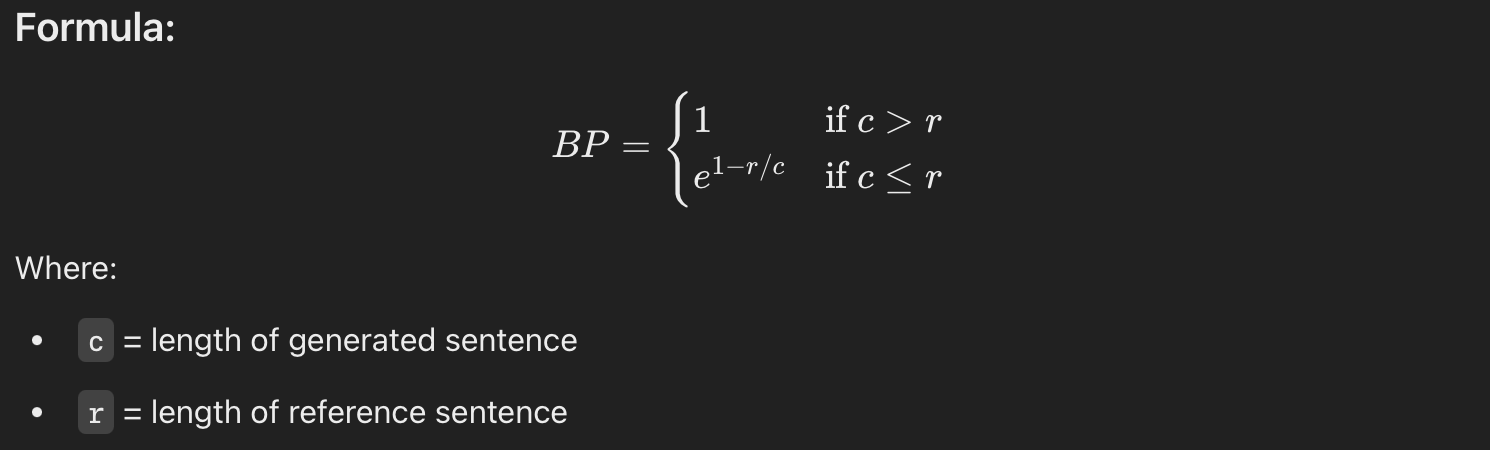

---

### 5️⃣ **Final BLEU Formula (for up to n-grams)**

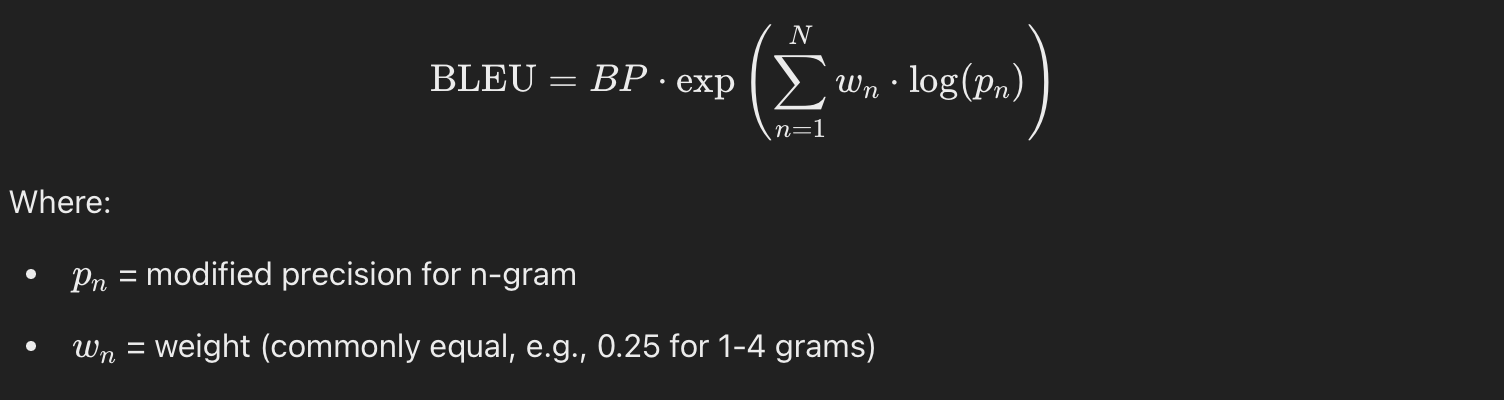

---

## 🧪 BLEU Example (Simplified)

| Metric                    | Value            |
|---------------------------|------------------|
| Reference                 | "Employees get 24 paid leave days"  
| Generated Answer          | "Employees get 24 leave days"  
| Matching unigrams         | 5 / 5 = 100%  
| Matching bigrams          | 3 / 4 = 75%  
| BP (same length)          | 1  
| BLEU Score (1–2 grams)    | ≈ 0.86 (high-quality)

---

## ✅ BLEU Score Range

- **0.0** → No overlap (bad)
- **1.0** → Perfect match (excellent)
- **Industry Rule-of-Thumb:**
  - **0.8+** → High-quality
  - **0.5–0.8** → Acceptable
  - **< 0.5** → Needs improvement

---

## 📍 BLEU in RAGAS

BLEU is **optionally used in RAGAS** to:
- Validate **Answer Correctness** (with ground truth)
- Cross-check performance of **generation quality**
- Complement semantic measures like **faithfulness or NLI-based metrics**

You can manually compute BLEU or plug into RAGAS pipelines.

```python
from evaluate import load

bleu = load("bleu")
result = bleu.compute(predictions=["Employees get 24 leave days"], references=[["Employees get 24 paid leave days"]])
print(result['bleu'])  # Output: 0.84 (for example)
```

---

## ✅ Summary Table

| Concept           | Meaning                                     |
|------------------|---------------------------------------------|
| n-gram            | Sequence of n words                        |
| Modified Precision| Adjusted match score (avoids overcounting) |
| Brevity Penalty   | Penalizes short answers                    |
| BLEU Score        | Weighted n-gram match with BP              |
| Range             | 0 (worst) to 1 (best)                      |

---

## 🧠 When to Use BLEU (vs RAGAS metrics)

| Use Case                                | BLEU | RAGAS Faithfulness |
|----------------------------------------|------|--------------------|
| Comparing exactness with reference      | ✅   | ❌                 |
| Checking hallucination (groundedness)  | ❌   | ✅                 |
| Good for summarization / translation   | ✅   | ❌                 |
| Source-aware answer validation          | ❌   | ✅                 |

---

In [10]:
!pip install sacrebleu -q
# sacrebleu is a standard evaluation library for BLEU scores, commonly used in machine translation and text generation tasks.

In [11]:
from ragas import SingleTurnSample
from ragas.metrics import BleuScore

test_data = {
    "user_input": "summarise given text\nThe company reported an 8% rise in Q3 2024, driven by strong performance in the Asian market. Sales in this region have significantly contributed to the overall growth. Analysts attribute this success to strategic marketing and product localization. The positive trend in the Asian market is expected to continue into the next quarter.",
    "response": "The company experienced an 8% increase in Q3 2024, largely due to effective marketing strategies and product adaptation, with expectations of continued growth in the coming quarter.",
    "reference": "The company reported an 8% growth in Q3 2024, primarily driven by strong sales in the Asian market, attributed to strategic marketing and localized products, with continued growth anticipated in the next quarter."
}
metric = BleuScore()
test_data = SingleTurnSample(**test_data)
metric.single_turn_score(test_data)

0.13718598426177148

In [12]:
from ragas.dataset_schema import SingleTurnSample
from ragas.metrics import BleuScore

sample = SingleTurnSample(
    response="The Eiffel Tower is located in India.",
    reference="The Eiffel Tower is located in Paris."
)

scorer = BleuScore()
await scorer.single_turn_ascore(sample)

0.7071067811865478

## 🔴 What is ROUGE?

**ROUGE** stands for:  
> **Recall-Oriented Understudy for Gisting Evaluation**

It’s a set of **metrics used to evaluate automatic summarization or generation tasks**, like:

- Summarization
- Question Answering
- Retrieval-Augmented Generation (RAG)

---

## 🧠 Simple Explanation

> ROUGE measures **how much of the reference (ground truth) answer appears in the generated answer**.

While **BLEU** focuses on **precision** (how much of the generated content is correct),  
**ROUGE focuses more on recall** (how much of the reference was captured).

---

## 🔢 ROUGE Variants (Most Used)

| Type        | Meaning                                                       |
|-------------|---------------------------------------------------------------|
| **ROUGE-1** | Overlap of **unigrams** (single words)                        |
| **ROUGE-2** | Overlap of **bigrams** (pairs of words)                       |
| **ROUGE-L** | Longest Common Subsequence (LCS) between reference & result   |

---

## 📐 How is ROUGE Calculated?

Let’s use **ROUGE-1** as an example.

---

### ✅ 1. **Unigrams (ROUGE-1)**

Suppose:

- **Generated Answer:** "Employees get 24 leave days"
- **Reference Answer:** "Employees get 24 paid leave days"

Unigrams in Generated = {employees, get, 24, leave, days}  
Unigrams in Reference = {employees, get, 24, paid, leave, days}

**Overlap (common):** employees, get, 24, leave, days → 5 words

---

### ✅ 2. **Formula: ROUGE Recall, Precision, F1**

Let’s define:

- **A** = words in generated answer  
- **B** = words in reference answer  
- **Overlap** = common words in both

#### 📘 ROUGE Recall:
\[
\text{Recall} = \frac{\text{# overlapping words}}{\text{# words in reference}}
\]

\[
= \frac{5}{6} = 0.83
\]

---

#### 📙 ROUGE Precision:
\[
\text{Precision} = \frac{\text{# overlapping words}}{\text{# words in generated}}
\]

\[
= \frac{5}{5} = 1.0
\]

---

#### 📗 ROUGE-F1:

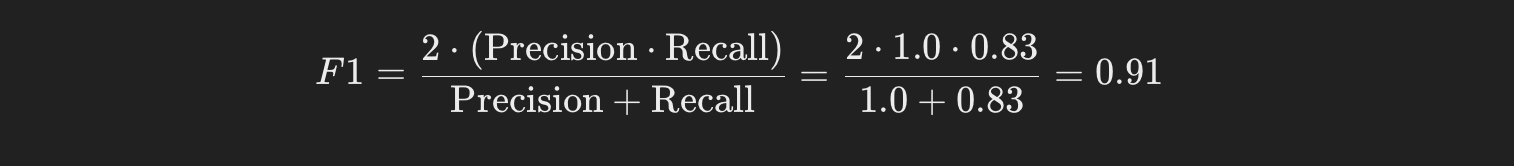

---

## 🧪 Example Summary Table

| Metric      | Score |
|-------------|-------|
| ROUGE-1     | 0.91  |
| ROUGE-2     | 0.85  |
| ROUGE-L     | 0.92  |

---

## 🔬 ROUGE vs BLEU

| Feature              | BLEU                         | ROUGE                        |
|----------------------|------------------------------|------------------------------|
| Focus                | Precision                    | Recall                       |
| Goal                 | How much of gen is correct   | How much of ref is covered   |
| Good For             | Translation                  | Summarization, QA            |
| Common in            | Machine Translation          | Summarization & RAG          |
| Metric               | n-gram overlap (gen → ref)   | n-gram overlap (ref → gen)   |

---

## 🔍 ROUGE in RAGAS

ROUGE is **not officially part of core RAGAS metrics** (which uses faithfulness, answer relevancy, etc.), but:

- You **can compute ROUGE** to compare **model-generated answers vs. ground truth**
- It helps when evaluating **extractive summarization** or **QA answer overlap**

---

## 🛠 How to Compute ROUGE in Python

```python
from evaluate import load

rouge = load("rouge")

# Sample prediction and reference
predictions = ["Employees get 24 leave days."]
references = ["Employees get 24 paid leave days."]

results = rouge.compute(predictions=predictions, references=references)

print(results)
```

### Output:
```python
{
  'rouge1': 0.83,
  'rouge2': 0.75,
  'rougeL': 0.85,
  'rougeLsum': 0.85
}
```

---

## 📚 Real-World RAG Example

**Question:** "How many paid leaves do I get?"

- **Reference:** "Employees get 24 paid leave days."
- **Model A Answer:** "Employees get 24 leave days."
- **Model B Answer:** "Employees receive 30 days off."

| Metric     | Model A     | Model B     |
|------------|-------------|-------------|
| ROUGE-1    | 0.91        | 0.67        |
| ROUGE-2    | 0.82        | 0.44        |
| ROUGE-L    | 0.92        | 0.56        |

🧠 **Model A** is closer in language and content. ROUGE confirms that.

---

## ✅ Summary

| Term        | Meaning |
|-------------|---------|
| ROUGE-1     | Recall-based overlap of unigrams (words)  
| ROUGE-2     | Bigram overlap (word pairs)  
| ROUGE-L     | Longest common sequence between reference and generated  
| ROUGE Recall| % of reference captured  
| ROUGE F1    | Balance of precision and recall

---

## 🚀 Use ROUGE When:
- Evaluating **QA or summarization** output quality
- Comparing **generated answers to ground-truth**
- Complementing semantic metrics (like **faithfulness** in RAGAS)

---

In [13]:
from ragas.dataset_schema import SingleTurnSample
from ragas.metrics import RougeScore

sample = SingleTurnSample(
    response="The Eiffel Tower is located in India.",
    reference="The Eiffel Tower is located in Paris."
)

scorer = RougeScore()
await scorer.single_turn_ascore(sample)

0.8571428571428571

In [14]:
from ragas.dataset_schema import SingleTurnSample
from ragas.metrics import RougeScore

sample = SingleTurnSample(
    response="The Eiffel Tower is located in India.",
    reference="The Eiffel Tower is located in Paris."
)

scorer = RougeScore(rouge_type="rouge1")
await scorer.single_turn_ascore(sample)

0.8571428571428571

In [15]:
from ragas.dataset_schema import SingleTurnSample
from ragas.metrics import RougeScore

sample = SingleTurnSample(
    response="The Eiffel Tower is located in India.",
    reference="The Eiffel Tower is located in Paris."
)

scorer = RougeScore(mode="recall")
await scorer.single_turn_ascore(sample)

0.8571428571428571

In [16]:
from ragas.dataset_schema import SingleTurnSample
from ragas.metrics import ExactMatch

sample = SingleTurnSample(
    response="India",
    reference="Paris"
)

scorer = ExactMatch()
await scorer.single_turn_ascore(sample)

0.0

In [17]:
from ragas.dataset_schema import SingleTurnSample
from ragas.metrics import StringPresence

sample = SingleTurnSample(
    response="The Eiffel Tower is located in India.",
    reference="Eiffel Tower"
)
scorer = StringPresence()
await scorer.single_turn_ascore(sample)

1.0

## Evaluate a simple RAG system

In [18]:
from langchain_openai import ChatOpenAI
from langchain_openai import OpenAIEmbeddings
llm = ChatOpenAI(model="gpt-4o")
embeddings = OpenAIEmbeddings()

In [19]:
import numpy as np

class RAG:
    def __init__(self, model="gpt-4o"):
        self.llm = ChatOpenAI(model=model)
        self.embeddings = OpenAIEmbeddings()
        self.doc_embeddings = None
        self.docs = None

    def load_documents(self, documents):
        """Load documents and compute their embeddings."""
        self.docs = documents
        self.doc_embeddings = self.embeddings.embed_documents(documents)

    def get_most_relevant_docs(self, query):
        """Find the most relevant document for a given query."""
        if not self.docs or not self.doc_embeddings:
            raise ValueError("Documents and their embeddings are not loaded.")

        query_embedding = self.embeddings.embed_query(query)
        similarities = [
            np.dot(query_embedding, doc_emb)
            / (np.linalg.norm(query_embedding) * np.linalg.norm(doc_emb))
            for doc_emb in self.doc_embeddings
        ]
        most_relevant_doc_index = np.argmax(similarities)
        return [self.docs[most_relevant_doc_index]]

    def generate_answer(self, query, relevant_doc):
        """Generate an answer for a given query based on the most relevant document."""
        prompt = f"question: {query}\n\nDocuments: {relevant_doc}"
        messages = [
            ("system", "You are a helpful assistant that answers questions based on given documents only."),
            ("human", prompt),
        ]
        ai_msg = self.llm.invoke(messages)
        return ai_msg.content

In [20]:
sample_docs = [
    "Albert Einstein proposed the theory of relativity, which transformed our understanding of time, space, and gravity.",
    "Marie Curie was a physicist and chemist who conducted pioneering research on radioactivity and won two Nobel Prizes.",
    "Isaac Newton formulated the laws of motion and universal gravitation, laying the foundation for classical mechanics.",
    "Charles Darwin introduced the theory of evolution by natural selection in his book 'On the Origin of Species'.",
    "Ada Lovelace is regarded as the first computer programmer for her work on Charles Babbage's early mechanical computer, the Analytical Engine."
]

In [21]:
# Initialize RAG instance
rag = RAG()

# Load documents
rag.load_documents(sample_docs)

# Query and retrieve the most relevant document
query = "Who introduced the theory of relativity?"
relevant_doc = rag.get_most_relevant_docs(query)

# Generate an answer
answer = rag.generate_answer(query, relevant_doc)

print(f"Query: {query}")
print(f"Relevant Document: {relevant_doc}")
print(f"Answer: {answer}")

Query: Who introduced the theory of relativity?
Relevant Document: ['Albert Einstein proposed the theory of relativity, which transformed our understanding of time, space, and gravity.']
Answer: Albert Einstein introduced the theory of relativity.


In [22]:
sample_queries = [
    "Who introduced the theory of relativity?",
    "Who was the first computer programmer?",
    "What did Isaac Newton contribute to science?",
    "Who won two Nobel Prizes for research on radioactivity?",
    "What is the theory of evolution by natural selection?"
]

expected_responses = [
    "Albert Einstein proposed the theory of relativity, which transformed our understanding of time, space, and gravity.",
    "Ada Lovelace is regarded as the first computer programmer for her work on Charles Babbage's early mechanical computer, the Analytical Engine.",
    "Isaac Newton formulated the laws of motion and universal gravitation, laying the foundation for classical mechanics.",
    "Marie Curie was a physicist and chemist who conducted pioneering research on radioactivity and won two Nobel Prizes.",
    "Charles Darwin introduced the theory of evolution by natural selection in his book 'On the Origin of Species'."
]

In [23]:
dataset = []

for query,reference in zip(sample_queries,expected_responses):

    relevant_docs = rag.get_most_relevant_docs(query)
    response = rag.generate_answer(query, relevant_docs)
    dataset.append(
        {
            "user_input":query,
            "retrieved_contexts":relevant_docs,
            "response":response,
            "reference":reference
        }
    )

In [24]:
from ragas import EvaluationDataset
# EvaluationDataset is a wrapper for RAG-style samples (like user query, response, reference answer, and optionally context documents).

evaluation_dataset = EvaluationDataset.from_list(dataset)

In [25]:
from ragas import evaluate
from ragas.llms import LangchainLLMWrapper


evaluator_llm = LangchainLLMWrapper(llm)
from ragas.metrics import LLMContextRecall, Faithfulness, FactualCorrectness

result = evaluate(dataset=evaluation_dataset,metrics=[LLMContextRecall(), Faithfulness(), FactualCorrectness()],llm=evaluator_llm)
result

Evaluating:   0%|          | 0/15 [00:00<?, ?it/s]

{'context_recall': 1.0000, 'faithfulness': 0.6400, 'factual_correctness(mode=f1)': 0.7740}

In [26]:
# https://app.ragas.io/dashboard/settings/app-tokens
import os
os.environ["RAGAS_APP_TOKEN"] = "apt.4870-cf5a67c95452-ee85-b4b4-648e61e6-a0383"

In [27]:
result.upload()

Evaluation results uploaded! View at https://app.ragas.io/dashboard/alignment/evaluation/1d02969a-68cd-496d-a6dd-9c2be0bee0cc


'https://app.ragas.io/dashboard/alignment/evaluation/1d02969a-68cd-496d-a6dd-9c2be0bee0cc'

In [28]:
from datasets import Dataset 
import os
from ragas import evaluate
from ragas.metrics import faithfulness, answer_correctness

data_samples = {
    'question': [
        'When was the first super bowl?', 
        'Who won the most super bowls?'
    ],
    'answer': [
        'The first superbowl was held on Jan 15, 1967', 
        'The most super bowls have been won by The New England Patriots'
    ],
    'contexts': [
        [
            'The First AFL–NFL World Championship Game was an American football game played on January 15, 1967, at the Los Angeles Memorial Coliseum in Los Angeles,'
        ], 
        [
            'The Green Bay Packers...Green Bay, Wisconsin.',
            'The Packers compete...Football Conference'
        ]
    ],
    'ground_truth': [
        'The first superbowl was held on January 15, 1967', 
        'The New England Patriots have won the Super Bowl a record six times'
    ]
}

dataset = Dataset.from_dict(data_samples)

score = evaluate(dataset, metrics=[faithfulness, answer_correctness])
df = score.to_pandas()
df.to_csv('score.csv', index=False)

Evaluating:   0%|          | 0/4 [00:00<?, ?it/s]

# Happy Learning